In [1]:
import tensorly as tl
import numpy as np
from HWES import *
from tensorcast import *
from HOLT import *
from statsmodels.tsa.holtwinters import Holt


In [2]:
def generateSynthetic(N,M,K,R):
    A = np.random.rand(N,R)
    B = np.random.rand(M,R)
    C = np.ones((K,R))
    for i in range(R):
        np.random.seed()
        seq = np.asarray(range(0,K))
#         trend = seq*2
#         sin = np.sin(2*np.pi)
#         noise = np.random.normal(0,1,K)
        col = seq*2 * (np.sin(seq)+1) + np.random.uniform(0,1,K) 
#         col = col/max(col)
        C[:,i] = C[:,i]*col
    A = tl.tensor(A)
    B = tl.tensor(B)
    C = tl.tensor(C)
    return A,B,C,col

In [3]:
def getDiff(A,B,C,Ap,Bp,Cp):
    a = tl.sum((A-Ap)**2)
    b = tl.sum((B-Bp)**2)
    c = tl.sum((C-Cp)**2)
    print(f'Non temporal factors difference:\nA: {a},\tB: {b}')
    print(f'Temporal factors difference:\nC: {c}')
    return a,b,c

In [4]:
def splitDataset(series,n):
    train = series[:-n]
    test = series[-n:]
    return train,test

In [5]:
# hyperparameters
N = 30
M = 30
K = 30
r = 5
d = 3
maxiters = 50
alpha = 0

In [16]:
:-10

SyntaxError: invalid syntax (<ipython-input-16-60391b29d9d6>, line 1)

In [6]:
A,B,C,col = generateSynthetic(N,M,K,r)

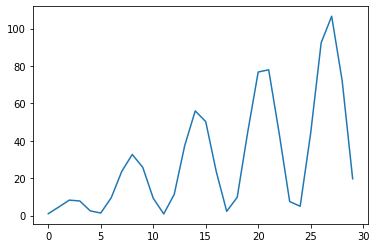

In [7]:
plt.plot(col)

In [8]:
A_pred,B_pred,T_pred = CoupledTensorFac(A,B,C,N,M,K,r,d,alpha,maxiters)

Non-negative Couple Tensor Factorization
Initial Error : 86713232.0
Iteration 1 error : 66842568.000 	Recon Tensor Fit : 0.127
Iteration 2 error : 30599272.000 	Recon Tensor Fit : 0.409
Iteration 3 error : 13262808.000 	Recon Tensor Fit : 0.611
Iteration 4 error : 7884560.000 	Recon Tensor Fit : 0.700
Iteration 5 error : 5925104.000 	Recon Tensor Fit : 0.740
Iteration 6 error : 4964176.000 	Recon Tensor Fit : 0.762
Iteration 7 error : 4385712.000 	Recon Tensor Fit : 0.776
Iteration 8 error : 3988896.000 	Recon Tensor Fit : 0.787
Iteration 9 error : 3692192.000 	Recon Tensor Fit : 0.795
Iteration 10 error : 3455760.000 	Recon Tensor Fit : 0.801
Iteration 11 error : 3260368.000 	Recon Tensor Fit : 0.807
Iteration 12 error : 3094032.000 	Recon Tensor Fit : 0.812
Iteration 13 error : 2950272.000 	Recon Tensor Fit : 0.817
Iteration 14 error : 2824432.000 	Recon Tensor Fit : 0.821
Iteration 15 error : 2713136.000 	Recon Tensor Fit : 0.824
Iteration 16 error : 2613872.000 	Recon Tensor Fit : 

In [9]:
saveFac(T_pred,'synthetic')

In [10]:
Tsynthetic = np.load('Tsynthetic.npy')

In [11]:
T_train, T_test = splitDataset(Tsynthetic[:,0],10)

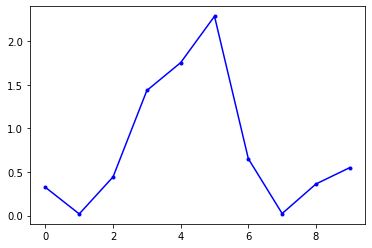

In [15]:
past, = plt.plot(np.asarray(range(0,len(T_train[:-10]))), T_train[-10:], 'b.-', label='Traffic histroy')

In [12]:
buildModelHolt(T_train,T_test,10,30)

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                   20
Model:                           Holt   SSE                             11.987
Optimized:                       True   AIC                             -2.238
Trend:                 Multiplicative   BIC                              1.745
Seasonal:                        None   AICC                             4.223
Seasonal Periods:                None   Date:                 Sun, 27 Jun 2021
Box-Cox:                        False   Time:                         16:57:51
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2445435                alpha                 True
smoothing_slope            0.2445418                

/home/seyunkim/anaconda3/envs/syenv/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


NameError: name 'np' is not defined

<Figure size 432x288 with 0 Axes>

In [5]:
X,Y,Z = RandomCoupledTensorFac(N,M,K,r,d,alpha,maxiters)

Non-negative Couple Tensor Factorization
Initial Error : 6701.125
tensor([128.6351, 159.5670, 129.3576, 120.3293, 148.8047])
tensor([192.4823, 180.8275, 170.6527, 149.4290, 212.5319])
tensor([0.8743, 0.9592, 0.9118, 0.9303, 0.8880])
tensor([0.7399, 0.0824, 0.3172, 0.2540, 0.7656])
Iteration 1 error : 4076.378	Error change : 2624.747 	Recon Tensor Fit : 0.232
tensor([109.9899, 143.8861, 113.4196, 107.8755, 129.9370])
tensor([119.1028, 120.8878, 108.3805,  98.8686, 135.4182])
tensor([0.9738, 1.0598, 1.0153, 1.0295, 0.9863])
tensor([0.7206, 0.0873, 0.3221, 0.2615, 0.7551])
Iteration 2 error : 3663.629	Error change : 412.749 	Recon Tensor Fit : 0.272


In [21]:
C,D,T500 = RandomCoupledTensorFac(N,M,K,r,d,alpha,maxiters)

Non-negative Couple Tensor Factorization
Initial Error : 10989.369140625
Iteration 1 error : 7440.357	Error change : 3549.012 	Recon Tensor Fit : 0.239
Iteration 2 error : 6800.730	Error change : 639.626 	Recon Tensor Fit : 0.272
Iteration 3 error : 6466.760	Error change : 333.971 	Recon Tensor Fit : 0.290
Iteration 4 error : 6254.811	Error change : 211.949 	Recon Tensor Fit : 0.302
Iteration 5 error : 6110.602	Error change : 144.208 	Recon Tensor Fit : 0.310
Iteration 6 error : 6005.519	Error change : 105.083 	Recon Tensor Fit : 0.316
Iteration 7 error : 5924.018	Error change : 81.501 	Recon Tensor Fit : 0.320
Iteration 8 error : 5857.888	Error change : 66.129 	Recon Tensor Fit : 0.324
Iteration 9 error : 5802.415	Error change : 55.474 	Recon Tensor Fit : 0.327
Iteration 10 error : 5754.927	Error change : 47.488 	Recon Tensor Fit : 0.330
Iteration 11 error : 5713.740	Error change : 41.187 	Recon Tensor Fit : 0.332
Iteration 12 error : 5677.621	Error change : 36.119 	Recon Tensor Fit :

<Figure size 432x288 with 0 Axes>

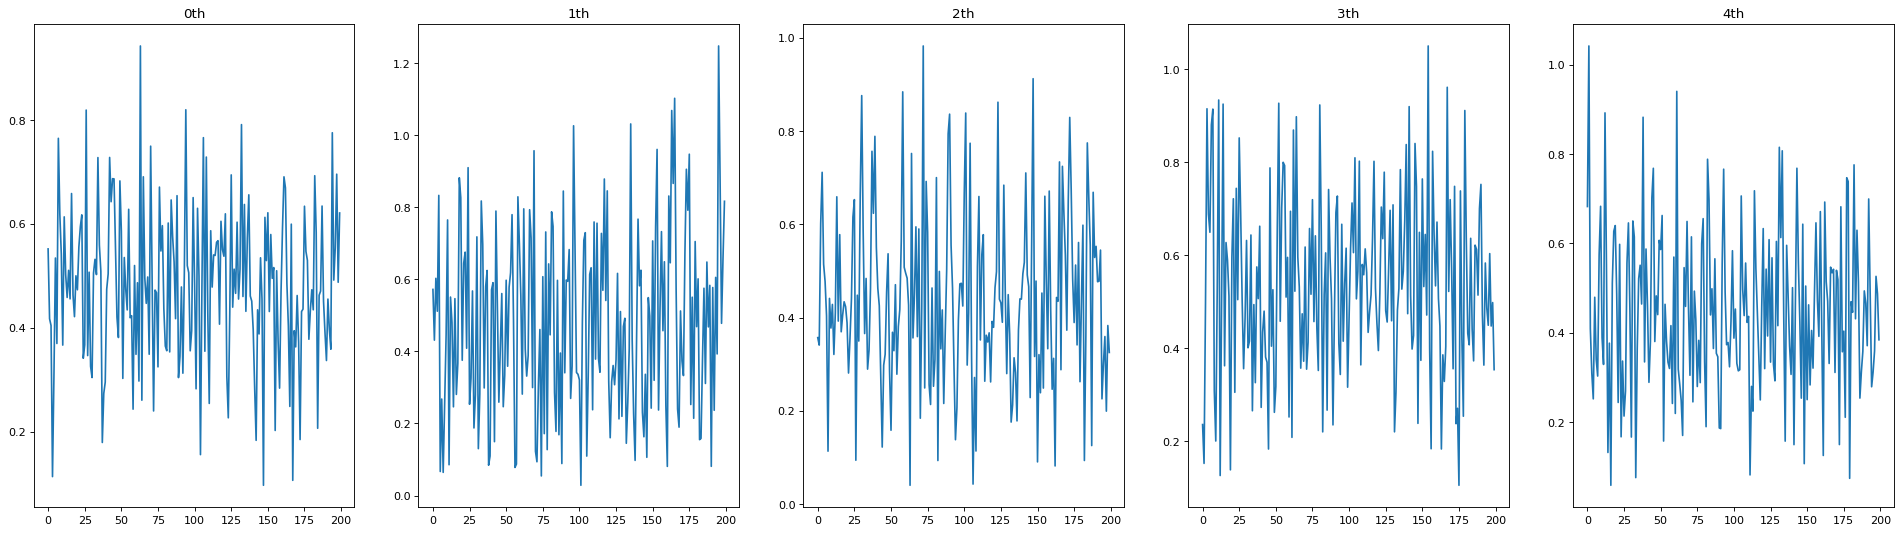

In [5]:
T200 = getDataset('T200.csv')
printFigure(T200,30,8)

/home/seyunkim/anaconda3/envs/syenv/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/seyunkim/tensorcast_py/HWES.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/seyunkim/anaconda3/envs/syenv/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/seyunkim/tensorcast_py/HOLT.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  190
Model:             ExponentialSmoothing   SSE                              5.545
Optimized:                         True   AIC                           -613.494
Trend:                         Additive   BIC                           -519.330
Seasonal:                Multiplicative   AICC                          -600.937
Seasonal Periods:                    25   Date:                 Tue, 22 Jun 2021
Box-Cox:                          False   Time:                         15:09:14
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0526316                alpha                 True
smoothing_slope          

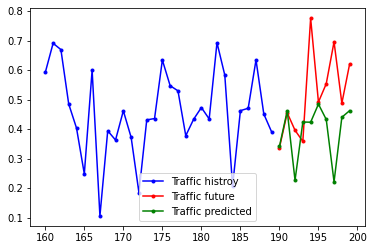

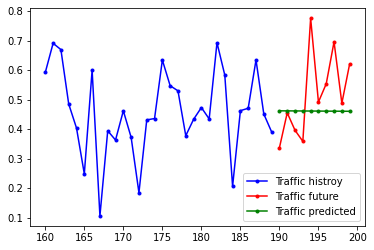

In [6]:
n=10
period=25
zoom=30
T200_train, T200_test = splitDataset(T200['0'],n)
buildModelHWES(T200_train,T200_test,period,n,zoom)


In [ ]:
def HOLT(data,step,summary):
    # SPLIT DATA
    
    holt = Holt(data)
    fit = holt.fit(optimized=True, use_brute=True)
    if summary:
        print(fit.summary)
    forecast = fit.forecast(steps=step)

In [15]:
holt = Holt(T200_train)
fit = holt.fit(optimized=True,use_brute=True)
print(fit.summary())
forecast = fit.forecast(steps=3)


                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                  190
Model:                           Holt   SSE                              4.108
Optimized:                       True   AIC                           -720.465
Trend:                       Additive   BIC                           -707.477
Seasonal:                        None   AICC                          -720.006
Seasonal Periods:                None   Date:                 Tue, 22 Jun 2021
Box-Cox:                        False   Time:                         15:13:44
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0007763                alpha                 True
smoothing_slope            0.0007763                

/home/seyunkim/anaconda3/envs/syenv/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


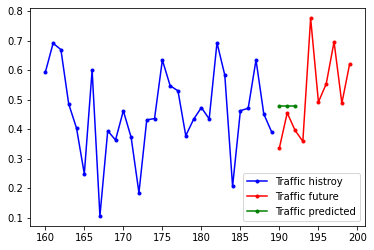

In [16]:
fig = plt.figure()
past, = plt.plot(T200_train[-zoom:].index, T200_train[-zoom:], 'b.-', label='Traffic histroy')
future, = plt.plot(T200_test[-zoom:].index, T200_test[-zoom:], 'r.-', label='Traffic future')
predicted, = plt.plot(forecast.index, forecast, 'g.-', label='Traffic predicted')
plt.legend()
fig.show()

190    0.479208
191    0.479208
192    0.479208
dtype: float64
